<a href="https://colab.research.google.com/github/EmilDragola/4KyrsNeiroseti/blob/master/NeirosetiPrakticheskaya3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## 1.3. Визуализируем часть данных из датасета

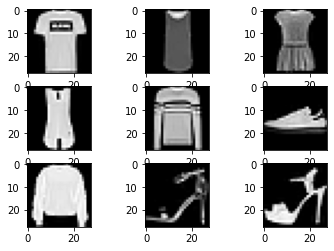

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
# Создание архитектуры нейронной сети
model = Sequential([Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2), strides=2),
Conv2D(64, (3, 3), padding='same', activation='relu'),
MaxPooling2D((2, 2), strides=2),
Flatten(),
Dense(128, activation='relu'),
Dense(10,  activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

## 1.5. Обучаем модель

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainy, batch_size=256, epochs=100, validation_data=(testX, testy))
model.evaluate(testX, testy)

Epoch 1/100
235/235 [==============================] - 5s 11ms/step - loss: 0.5593 - accuracy: 0.8055 - val_loss: 0.3920 - val_accuracy: 0.8579
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3382 - accuracy: 0.8805 - val_loss: 0.3391 - val_accuracy: 0.8791
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2900 - accuracy: 0.8969 - val_loss: 0.3009 - val_accuracy: 0.8895
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.2594 - accuracy: 0.9071 - val_loss: 0.3154 - val_accuracy: 0.8896
Epoch 5/100
235/235 [==============================] - 3s 15ms/step - loss: 0.2408 - accuracy: 0.9129 - val_loss: 0.2769 - val_accuracy: 0.9000
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2253 - accuracy: 0.9192 - val_loss: 0.2654 - val_accuracy: 0.9058
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2104 - accuracy: 0.9240 - val_loss: 0.2653 - val_accuracy:

[0.8328490257263184, 0.9239000082015991]

In [ ]:
model.save('/content/drive/MyDrive/ModelZad2(1).h5')

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

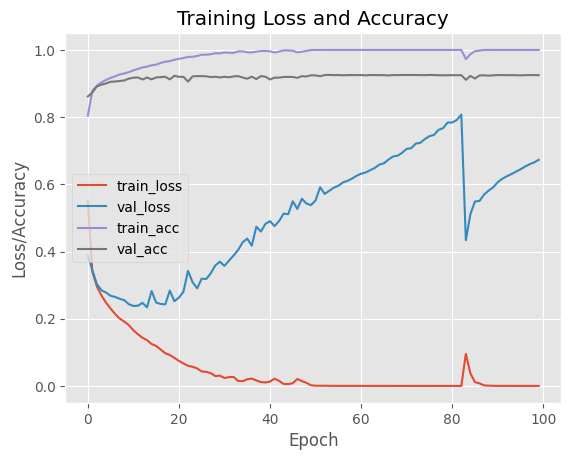

In [ ]:
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
import cv2
lables = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def test_predict(image_path):
    image = cv2.imread(image_path)
    output = image.copy()
    image = cv2.resize(image, (28, 28))
    image = cv2.bitwise_not(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image.astype("float") / 255.0
    image = image.reshape(-1, 28, 28, 1)
    preds = model.predict(image)
    i = preds.argmax(axis=1)[0]
    for index, pred in enumerate(preds[0]):
        print(f"{lables[index]}:{pred * 100:.2f}%", end="; ")
    print()
    text = "{}: {:.2f}%".format(lables[i], preds[0][i] * 100)
    _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 67ms/step
T-shirt/top:0.00%; Trouser:99.99%; Pullover:0.00%; Dress:0.00%; Coat:0.00%; Sandal:0.00%; Shirt:0.01%; Sneaker:0.00%; Bag:0.00%; Ankle boot:0.00%; 


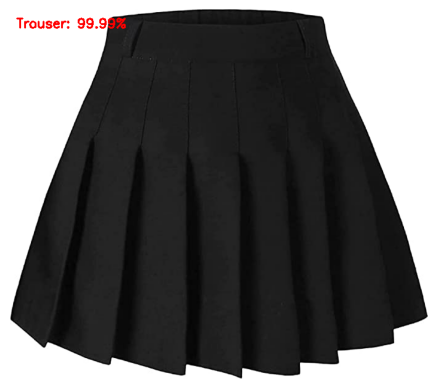

In [ ]:
test_predict('/content/drive/MyDrive/park3/image1.jpg')

1/1 [==============================] - 0s 22ms/step
T-shirt/top:0.00%; Trouser:96.33%; Pullover:0.00%; Dress:0.00%; Coat:3.63%; Sandal:0.00%; Shirt:0.03%; Sneaker:0.00%; Bag:0.01%; Ankle boot:0.00%; 


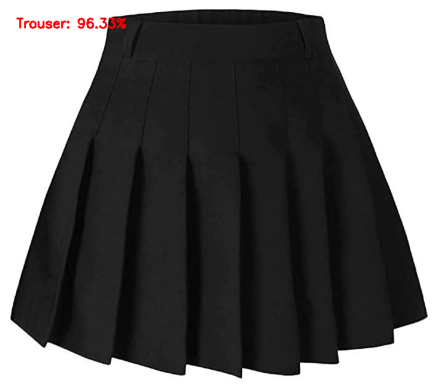

In [ ]:
from PIL import Image

image_path = '/content/drive/MyDrive/park3/image1.jpg'
image = Image.open(image_path)
bw_image = image.convert("L")
bw_image_path = '/content/drive/MyDrive/park3/image1_bw.jpg'
bw_image.save(bw_image_path)

# Обработка черно-белого изображения
test_predict('/content/drive/MyDrive/park3/image1_bw.jpg')


1/1 [==============================] - 0s 19ms/step
T-shirt/top:0.23%; Trouser:0.00%; Pullover:10.21%; Dress:0.02%; Coat:57.50%; Sandal:0.00%; Shirt:15.67%; Sneaker:0.00%; Bag:16.37%; Ankle boot:0.00%; 


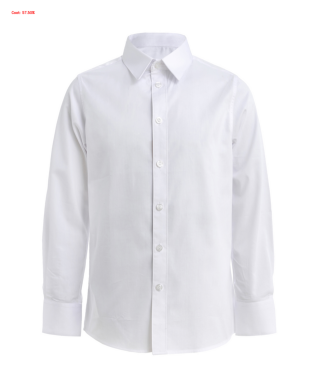

In [ ]:
test_predict('/content/drive/MyDrive/park3/image2.jpg')

1/1 [==============================] - 0s 18ms/step
T-shirt/top:0.15%; Trouser:0.00%; Pullover:16.41%; Dress:0.03%; Coat:43.09%; Sandal:0.00%; Shirt:25.86%; Sneaker:0.00%; Bag:14.47%; Ankle boot:0.00%; 


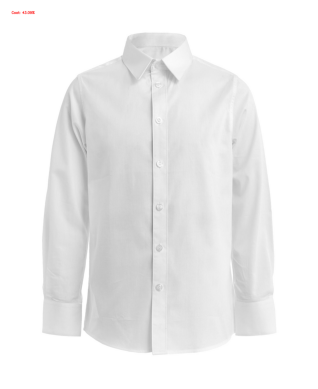

In [ ]:
image_path = '/content/drive/MyDrive/park3/image2.jpg'
image = Image.open(image_path)
bw_image = image.convert("L")
bw_image_path = '/content/drive/MyDrive/park3/image2_bw.jpg'
bw_image.save(bw_image_path)

# Обработка черно-белого изображения
test_predict('/content/drive/MyDrive/park3/image2_bw.jpg')


1/1 [==============================] - 0s 32ms/step
T-shirt/top:0.00%; Trouser:100.00%; Pullover:0.00%; Dress:0.00%; Coat:0.00%; Sandal:0.00%; Shirt:0.00%; Sneaker:0.00%; Bag:0.00%; Ankle boot:0.00%; 


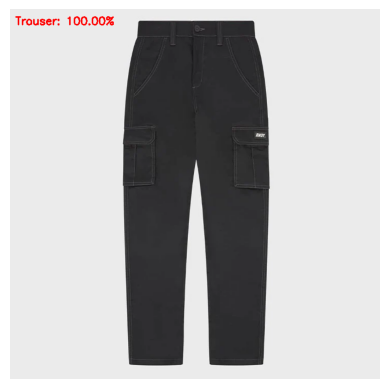

In [ ]:
test_predict('/content/drive/MyDrive/park3/image3.jpg')

1/1 [==============================] - 0s 37ms/step
T-shirt/top:0.00%; Trouser:100.00%; Pullover:0.00%; Dress:0.00%; Coat:0.00%; Sandal:0.00%; Shirt:0.00%; Sneaker:0.00%; Bag:0.00%; Ankle boot:0.00%; 


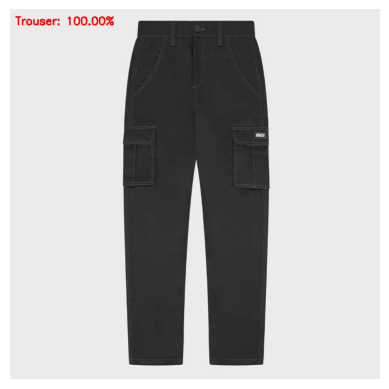

In [ ]:
image_path = '/content/drive/MyDrive/park3/image3.jpg'
image = Image.open(image_path)
bw_image = image.convert("L")
bw_image_path = '/content/drive/MyDrive/park3/image3_bw.jpg'
bw_image.save(bw_image_path)

# Обработка черно-белого изображения
test_predict('/content/drive/MyDrive/park3/image3_bw.jpg')


1/1 [==============================] - 0s 19ms/step
T-shirt/top:0.00%; Trouser:0.00%; Pullover:0.60%; Dress:0.00%; Coat:0.00%; Sandal:95.99%; Shirt:0.00%; Sneaker:0.00%; Bag:3.41%; Ankle boot:0.00%; 


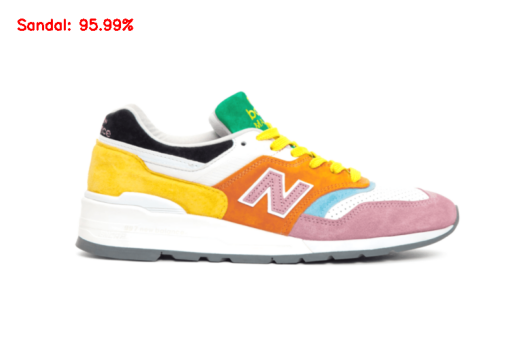

In [ ]:
test_predict('/content/drive/MyDrive/park3/image8.jpg')

1/1 [==============================] - 0s 25ms/step
T-shirt/top:0.00%; Trouser:0.00%; Pullover:5.78%; Dress:0.00%; Coat:0.00%; Sandal:70.00%; Shirt:0.00%; Sneaker:0.00%; Bag:24.22%; Ankle boot:0.00%; 


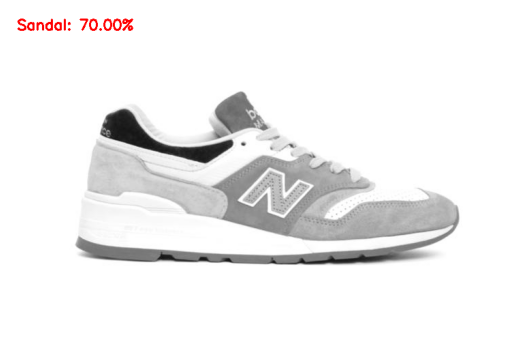

In [ ]:
image_path = '/content/drive/MyDrive/park3/image8.jpg'
image = Image.open(image_path)
bw_image = image.convert("L")
bw_image_path = '/content/drive/MyDrive/park3/image8_bw.jpg'
bw_image.save(bw_image_path)

# Обработка черно-белого изображения
test_predict('/content/drive/MyDrive/park3/image8_bw.jpg')

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

from keras.models import Sequential


from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, AveragePooling2D 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/food2/food2")))

random.shuffle(imagePaths)

In [ ]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)) # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # 

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(trainX, testX, trainY, testY)= train_test_split(data, labels, test_size=0.25, random_state=42)

trainX = trainX / 255
testX = testX / 255
 

# trainX = np.expand_dims(trainX, axis=3)
# testX = np.expand_dims(testX, axis=3)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (225, 32, 32, 3)
Test: X =  (75, 32, 32, 3)


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Train: Y = ', trainY.shape)
print('Test: Y = ', testY.shape)

Train: Y =  (225, 4)
Test: Y =  (75, 4)


In [ ]:
model = keras.Sequential([
    Conv2D(6, (5,5), strides=(1,1), activation='relu', input_shape=(32,32,3)), # В оригинальной архитектуре входные данные 
                                                                               # имели размерность 32,32,1)
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides=(1,1), activation='relu'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=4,activation='softmax') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
EPOCHS = 100

In [ ]:
his = model.fit(trainX, trainY, batch_size=256, epochs=EPOCHS, validation_split=0.1)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 1.3861 - accuracy: 0.4356 - val_loss: 1.3829 - val_accuracy: 0.4348
Epoch 2/100
1/1 [==============================] - 0s 117ms/step - loss: 1.3824 - accuracy: 0.5000 - val_loss: 1.3785 - val_accuracy: 0.4348
Epoch 3/100
1/1 [==============================] - 0s 109ms/step - loss: 1.3776 - accuracy: 0.5000 - val_loss: 1.3731 - val_accuracy: 0.4348
Epoch 4/100
1/1 [==============================] - 0s 158ms/step - loss: 1.3716 - accuracy: 0.5000 - val_loss: 1.3666 - val_accuracy: 0.4348
Epoch 5/100
1/1 [==============================] - 0s 147ms/step - loss: 1.3641 - accuracy: 0.5000 - val_loss: 1.3587 - val_accuracy: 0.4348
Epoch 6/100
1/1 [==============================] - 0s 122ms/step - loss: 1.3551 - accuracy: 0.5000 - val_loss: 1.3495 - val_accuracy: 0.4348
Epoch 7/100
1/1 [==============================] - 0s 128ms/step - loss: 1.3444 - accuracy: 0.5000 - val_loss: 1.3388 - val_accuracy: 0.4348
Epoch 8/100
1/1 

In [ ]:
number_one = model.evaluate(testX, testY)

3/3 [==============================] - 0s 28ms/step - loss: 1.2281 - accuracy: 0.5200


In [ ]:
print("[INFO] serializing network and label binarizer...")
model.save("model_old.h5", save_format="h5")
f = open("label_bin_old", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


In [ ]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/food2/food2")))

random.shuffle(imagePaths)

In [ ]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # 

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
INIT_LR = 0.01
EPOCHS = 35

In [ ]:
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
H = model.fit(trainX, trainY, validation_data=(trainX, trainY), 
	epochs=EPOCHS, batch_size=256)

Epoch 1/35
1/1 [==============================] - 1s 550ms/step - loss: 1.4607 - accuracy: 0.1644 - val_loss: 1.3396 - val_accuracy: 0.4089
Epoch 2/35
1/1 [==============================] - 0s 38ms/step - loss: 1.3396 - accuracy: 0.4089 - val_loss: 1.2976 - val_accuracy: 0.4978
Epoch 3/35
1/1 [==============================] - 0s 44ms/step - loss: 1.2976 - accuracy: 0.4978 - val_loss: 1.2728 - val_accuracy: 0.5022
Epoch 4/35
1/1 [==============================] - 0s 38ms/step - loss: 1.2728 - accuracy: 0.5022 - val_loss: 1.2573 - val_accuracy: 0.4978
Epoch 5/35
1/1 [==============================] - 0s 40ms/step - loss: 1.2573 - accuracy: 0.4978 - val_loss: 1.2474 - val_accuracy: 0.4978
Epoch 6/35
1/1 [==============================] - 0s 54ms/step - loss: 1.2474 - accuracy: 0.4978 - val_loss: 1.2400 - val_accuracy: 0.4978
Epoch 7/35
1/1 [==============================] - 0s 50ms/step - loss: 1.2400 - accuracy: 0.4978 - val_loss: 1.2334 - val_accuracy: 0.4978
Epoch 8/35
1/1 [==========

In [ ]:
model.evaluate(testX, testY)

3/3 [==============================] - 0s 5ms/step - loss: 1.2058 - accuracy: 0.5467


[1.2058260440826416, 0.54666668176651]

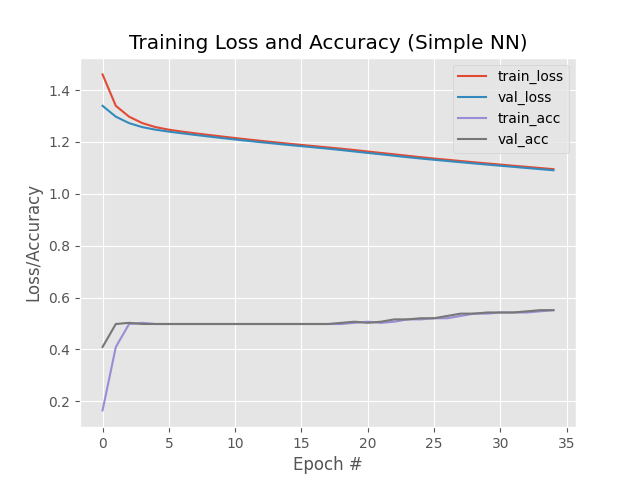

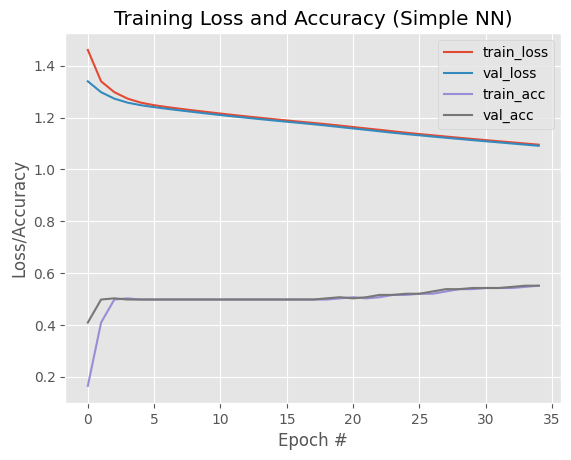

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

2/2 [==============================] - 0s 5ms/step
Image 1: Предсказание: Pizza, Predictions: [0.5154002  0.22856171 0.10474466 0.1512935 ]


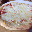

Image 2: Предсказание: Pizza, Predictions: [0.5378148  0.23670511 0.10167105 0.12380902]


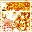

Image 3: Предсказание: Pizza, Predictions: [0.48863488 0.2287285  0.10056289 0.18207377]


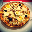

Image 4: Предсказание: Pizza, Predictions: [0.6899728  0.16178685 0.05439625 0.09384409]


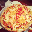

Image 5: Предсказание: Pizza, Predictions: [0.5283828  0.21999583 0.1054013  0.14622012]


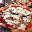

Image 6: Предсказание: Pizza, Predictions: [0.59231865 0.1611722  0.10527759 0.14123157]


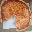

Image 7: Предсказание: Pizza, Predictions: [0.43685296 0.20123222 0.20824039 0.15367438]


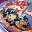

Image 8: Предсказание: Pizza, Predictions: [0.61383414 0.17848457 0.08290151 0.12477975]


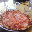

Image 9: Предсказание: Pizza, Predictions: [0.49747816 0.251052   0.12171711 0.12975277]


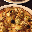

Image 10: Предсказание: Pizza, Predictions: [0.42895997 0.26208147 0.13574284 0.17321573]


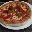

Image 11: Предсказание: Pizza, Predictions: [0.58241403 0.23219302 0.09056141 0.0948315 ]


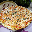

Image 12: Предсказание: Pizza, Predictions: [0.47890317 0.2690334  0.09704304 0.15502037]


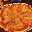

Image 13: Предсказание: Pizza, Predictions: [0.5069175  0.2530969  0.08737379 0.15261187]


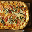

Image 14: Предсказание: Pizza, Predictions: [0.44085276 0.22152212 0.18687598 0.15074916]


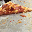

Image 15: Предсказание: Pizza, Predictions: [0.48292166 0.19886371 0.16880965 0.149405  ]


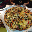

Image 16: Предсказание: Pizza, Predictions: [0.35129365 0.22276917 0.20443733 0.22149979]


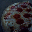

Image 17: Предсказание: Pizza, Predictions: [0.45800856 0.28534073 0.10467075 0.15198   ]


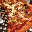

Image 18: Предсказание: Pizza, Predictions: [0.49502122 0.2375684  0.13180865 0.13560173]


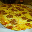

Image 19: Предсказание: Pizza, Predictions: [0.45742005 0.20419078 0.17873009 0.15965909]


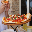

Image 20: Предсказание: Pizza, Predictions: [0.33959192 0.28513902 0.14864516 0.22662392]


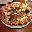

Image 21: Предсказание: Pizza, Predictions: [0.284208   0.24714927 0.23424642 0.23439634]


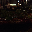

Image 22: Предсказание: Pizza, Predictions: [0.3637773  0.29807645 0.12245209 0.21569416]


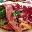

Image 23: Предсказание: Pizza, Predictions: [0.4937204  0.22281116 0.14492215 0.13854626]


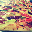

Image 24: Предсказание: Pizza, Predictions: [0.60477895 0.12931547 0.14089641 0.1250092 ]


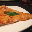

Image 25: Предсказание: Pizza, Predictions: [0.3852458  0.21106778 0.2134191  0.1902673 ]


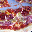

Image 26: Предсказание: Pizza, Predictions: [0.37233537 0.19356433 0.26373574 0.17036459]


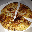

Image 27: Предсказание: Pizza, Predictions: [0.6131478  0.20026684 0.08595506 0.10063029]


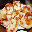

Image 28: Предсказание: Pizza, Predictions: [0.6235071  0.17990607 0.09223465 0.10435218]


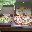

Image 29: Предсказание: Pizza, Predictions: [0.427898   0.2366025  0.15224625 0.18325329]


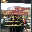

Image 30: Предсказание: Pizza, Predictions: [0.60117775 0.18998842 0.07829566 0.13053823]


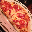

Image 31: Предсказание: Pizza, Predictions: [0.4743238  0.22317867 0.1674843  0.1350132 ]


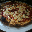

Image 32: Предсказание: Pizza, Predictions: [0.47354153 0.28945684 0.12181974 0.11518196]


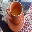

Image 33: Предсказание: Pizza, Predictions: [0.43867865 0.22695847 0.14929108 0.18507183]


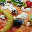

Image 34: Предсказание: Pizza, Predictions: [0.3324547  0.28708425 0.16552186 0.21493915]


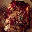

Image 35: Предсказание: Pizza, Predictions: [0.5047784  0.17725548 0.16511294 0.15285318]


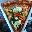

Image 36: Предсказание: Pizza, Predictions: [0.582154   0.18942215 0.11455051 0.1138734 ]


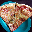

Image 37: Предсказание: Steak, Predictions: [0.32546324 0.4093905  0.11269647 0.15244977]


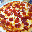

Image 38: Предсказание: Pizza, Predictions: [0.38617703 0.27186203 0.1481978  0.19376314]


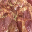

Image 39: Предсказание: Pizza, Predictions: [0.4854521  0.27560848 0.11400893 0.12493051]


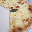

Image 40: Предсказание: Pizza, Predictions: [0.5410157  0.2499288  0.10119947 0.10785603]


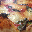

Image 41: Предсказание: Pizza, Predictions: [0.5991158  0.20558967 0.08559912 0.10969542]


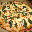

Image 42: Предсказание: Pizza, Predictions: [0.51352346 0.21387956 0.12940879 0.1431882 ]


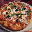

Image 43: Предсказание: Pizza, Predictions: [0.41040856 0.27034217 0.14861885 0.17063047]


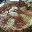

Image 44: Предсказание: Pizza, Predictions: [0.37804666 0.26246804 0.18189315 0.17759216]


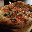

Image 45: Предсказание: Pizza, Predictions: [0.45616397 0.22067147 0.13493133 0.1882332 ]


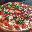

Image 46: Предсказание: Pizza, Predictions: [0.42051807 0.25791848 0.15287662 0.16868678]


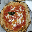

Image 47: Предсказание: Pizza, Predictions: [0.5201804  0.22166526 0.12379907 0.13435523]


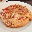

Image 48: Предсказание: Pizza, Predictions: [0.60474265 0.1419594  0.14250211 0.11079589]


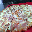

Image 49: Предсказание: Pizza, Predictions: [0.26029086 0.23971625 0.2490222  0.2509707 ]


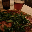

Image 50: Предсказание: Pizza, Predictions: [0.38415533 0.210792   0.24948992 0.15556279]


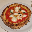

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Импорт функции cv2_imshow для вывода изображений

data_path = "/content/drive/MyDrive/food2/food2/Pizza/"

# Загрузка изображений и обрезка до размера 32x32
images = []
for filename in os.listdir(data_path):
    img = cv2.imread(os.path.join(data_path, filename))
    img = cv2.resize(img, (32, 32))
    images.append(img)

images = np.array(images)

images_flat = images.reshape(images.shape[0], -1)
images_flat = images_flat / 255.0

predictions = model.predict(images_flat)

labels = ['Pizza', 'Steak', 'Sushi'] 
for i, img in enumerate(images):
    prediction = predictions[i]
    label_index = np.argmax(prediction)
    label = labels[label_index]
    print(f"Image {i + 1}: Предсказание: {label}, Predictions: {prediction}")

    cv2_imshow(img)

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

In [ ]:
# Определяем верхнюю половину изображения
n_pixels = train.shape[1]
X_train = train[:, :(n_pixels + 1) // 2, :]
X_test = test[:, :(n_pixels + 1) // 2, :]

# Определяем нижнюю половину изображения
y_train = train[:, n_pixels // 2:, :]
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)

y_test = test[:, n_pixels // 2:, :]
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Encoder
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)

encoder = keras.Model(encoder_inputs, x, name="encoder")
encoder.summary()

# Decoder
decoder_inputs = keras.Input(shape=(16,))
x = keras.layers.Dense(units=7*7*64, activation='relu')(decoder_inputs)
x = keras.layers.Reshape(target_shape=(7, 7, 64))(x)
x = keras.layers.Conv2DTranspose(filters=32, kernel_size=3, activation='relu', strides=2, padding='same')(x)
x = keras.layers.Conv2DTranspose(filters=16, kernel_size=3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = keras.layers.Conv2DTranspose(filters=1, kernel_size=3, activation='sigmoid', padding='same')(x)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

# Autoencoder
autoencoder_inputs = keras.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_inputs)
decoded = decoder(encoded)
autoencoder = keras.Model(autoencoder_inputs, decoded, name="autoencoder")
autoencoder.summary()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load and prepare the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_15 (Dense)            (None, 16)                50192     
                                                                 
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
______________________________________

In [ ]:
#Импортируем необходимые библиотеки и функции
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Создаем модель
model = Sequential()

#Добавляем сверточные слои
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

#Добавляем полносвязные слои
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2048, activation='sigmoid'))

#Компилируем модель
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

#Выводим информацию о модели
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 1024)             

In [ ]:
from tensorflow import keras

model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [ ]:
import tensorflow as tf

# Задаем архитектуру нейронной сети
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Компилируем модель с использованием функции потерь, оптимизатора и метрики
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучаем модель на тренировочных данных в течение 20 эпох
model.fit(train_images, train_labels, epochs=20)


NameError: ignored

In [ ]:
import numpy as np
from tensorflow import keras

# Загрузка данных
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Нормализация данных
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Расширение размерности тензоров
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Создание модели нейронной сети
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

# Компиляция модели
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Обучение модели на данных
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 80s 52ms/step - loss: 0.1394 - accuracy: 0.9572 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 2/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0506 - val_accuracy: 0.9844
Epoch 3/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0403 - val_accuracy: 0.9877
Epoch 4/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0487 - val_accuracy: 0.9869
Epoch 5/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 6/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0411 - val_accuracy: 0.9902
Epoch 7/10
1500/1500 [==============================] - 71s

In [ ]:
from tensorflow.keras.datasets import mnist

# Загрузка данных
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Преобразование данных к формату [0, 1]
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)
train.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(320, 4096)

In [ ]:
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

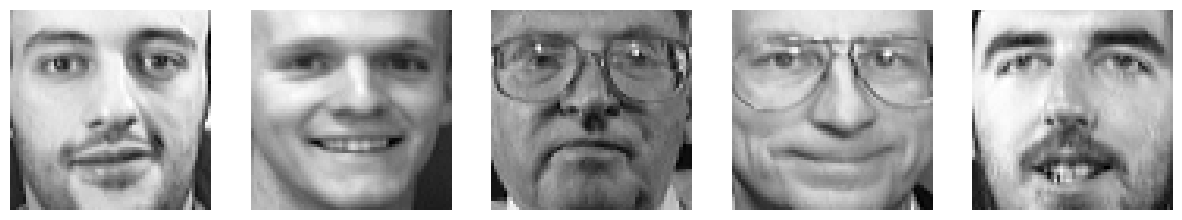

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

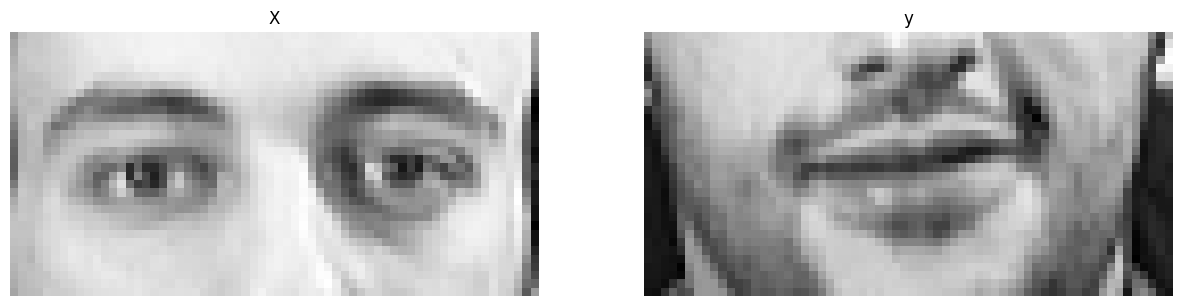

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

X_train.shape, y_train_n.shape

((320, 32, 64), (320, 2048))

In [ ]:
from keras import optimizers

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = keras.Sequential([
    Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (5,5), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (5,5), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(2048,  activation='relu')
])


model.summary()

optimizer = optimizers.Adam(0.001)

EPOCH = 1300

model.compile(optimizer=optimizer,
             loss='mean_squared_error',
             metrics=['mse'])

X_train.shape, y_train_n.shape

his = model.fit(X_train, y_train_n, batch_size=1000, epochs=EPOCH, validation_split=0.2)

# model.evaluate(X_test, y_test_cat) # метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки 
                                   #(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 64, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 32, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 16, 128)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 16, 256)        819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 8, 256)        0

In [ ]:
model.evaluate(X_test, y_test_n) # метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки 
                                   #(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.

3/3 [==============================] - 0s 60ms/step - loss: 0.0135 - mse: 0.0135


[0.013495096936821938, 0.013495096936821938]

In [ ]:
import numpy as np
a = []
a.append(model.predict(X_test).reshape(80, 32, 64))
print(np.asarray(a).shape)

3/3 [==============================] - 0s 4ms/step
(1, 80, 32, 64)


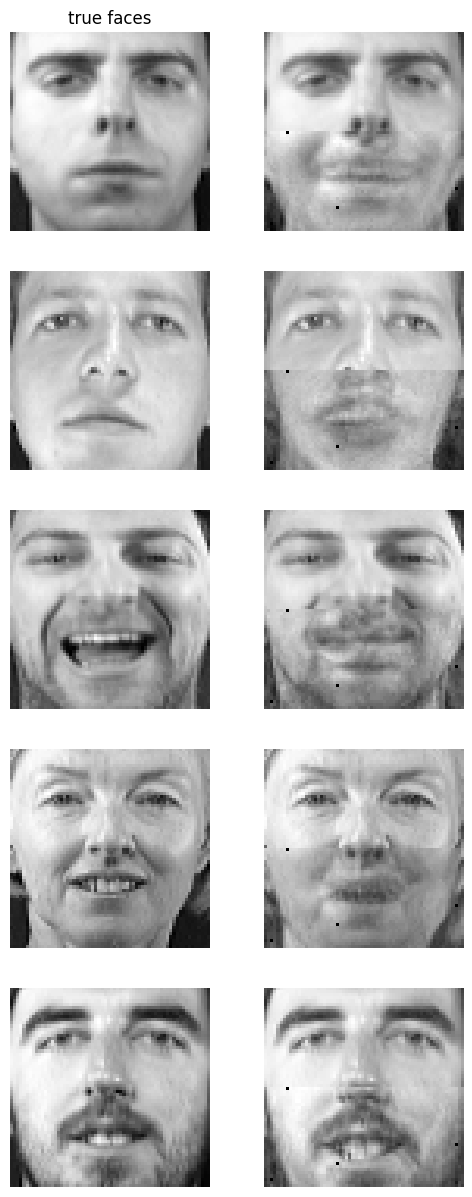

In [ ]:
n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], np.asarray(a[0][i])))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )